In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel(r"D:\Job\Time Series\Source\Rajasthan.xlsx")

In [3]:
df

,State,District,Market,Variety,Group,Arrivals,Min Price,Max Price,Modal Price,Reported Date,Commodity
0,Rajasthan,Ajmer,Ajmer (Grain),Other,Cereals,1.70,1300.0,1500.0,1400.0,11 Aug 2021,Bajra(Pearl Millet/Cumbu)
1,Rajasthan,Ajmer,Ajmer (Grain),Other,Cereals,1.00,1300.0,1500.0,1400.0,10 Aug 2021,Bajra(Pearl Millet/Cumbu)
2,Rajasthan,Ajmer,Ajmer (Grain),Other,Cereals,3.00,1300.0,1500.0,1400.0,09 Aug 2021,Bajra(Pearl Millet/Cumbu)
3,Rajasthan,Ajmer,Ajmer (Grain),Other,Cereals,5.70,1300.0,1500.0,1400.0,08 Aug 2021,Bajra(Pearl Millet/Cumbu)
4,Rajasthan,Ajmer,Ajmer (Grain),Other,Cereals,1.20,1300.0,1400.0,1350.0,25 Jul 2021,Bajra(Pearl Millet/Cumbu)
...,...,...,...,...,...,...,...,...,...,...,...
521850,Rajasthan,Udaipur,Udaipur(F&V),Other,Fruits,22.3,400.0,1000.0,700.0,10 Jun 2021,Water Melon
521851,Rajasthan,Udaipur,Udaipur(F&V),Other,Fruits,16.5,400.0,1000.0,700.0,09 Jun 2021,Water Melon
521852,Rajasthan,Udaipur,Udaipur(F&V),Other,Fruits,42.4,400.0,800.0,600.0,08 Jun 2021,Water Melon
521853,Rajasthan,Udaipur,Udaipur(F&V),Other,Fruits,43.2,400.0,1000.0,700.0,07 Jun 2021,Water Melon


In [4]:
df1=pd.DataFrame()

In [5]:
#df1=df[(df['Commodity'] == 'Wheat') & (df['Market'] == 'Anoopgarh') & (df['Variety'] == 'Dara')]
df1=df[(df['Commodity'] == 'Barley (Jau)') & (df['Market'] == 'Alwar') & (df['Variety'] == 'Other')]

In [6]:
df1['Arrivals']=df1['Arrivals'].str.replace(',','').replace('nan','NaN').astype('float')

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_10428\2442083992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Arrivals']=df1['Arrivals'].str.replace(',','').replace('nan','NaN').astype('float')


In [7]:
df1['Reported Date']=pd.to_datetime(df1['Reported Date'])

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_10428\1524859383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reported Date']=pd.to_datetime(df1['Reported Date'])


In [8]:
df1=df1.sort_values(by='Reported Date')

In [9]:
df1['Arrivals'].fillna(method = 'bfill',inplace=True)

In [10]:
df1['Year']=df1['Reported Date'].dt.year
df1['Month']=df1['Reported Date'].dt.month
df1['Week']=df1['Reported Date'].dt.week
df1['Date_Group']=df1['Reported Date'].dt.year.astype(str) +'#'+df1['Reported Date'].dt.month.astype(str)+'#'+df1['Reported Date'].dt.week.astype(str)

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_10428\2226878606.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Week']=df1['Reported Date'].dt.week
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_10428\2226878606.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Date_Group']=df1['Reported Date'].dt.year.astype(str) +'#'+df1['Reported Date'].dt.month.astype(str)+'#'+df1['Reported Date'].dt.week.astype(str)


In [11]:
df1.head()

,State,District,Market,Variety,Group,Arrivals,Min Price,Max Price,Modal Price,Reported Date,Commodity,Year,Month,Week,Date_Group
43563,Rajasthan,Alwar,Alwar,Other,Cereals,0.3,1970.0,2000.0,1990.0,2020-01-01,Barley (Jau),2020,1,1,2020#1#1
43562,Rajasthan,Alwar,Alwar,Other,Cereals,0.6,1970.0,2000.0,1990.0,2020-01-02,Barley (Jau),2020,1,1,2020#1#1
43561,Rajasthan,Alwar,Alwar,Other,Cereals,19.2,1970.0,2000.0,1990.0,2020-01-07,Barley (Jau),2020,1,2,2020#1#2
43560,Rajasthan,Alwar,Alwar,Other,Cereals,5.7,1950.0,2000.0,1975.0,2020-01-08,Barley (Jau),2020,1,2,2020#1#2
43559,Rajasthan,Alwar,Alwar,Other,Cereals,0.7,1950.0,2000.0,1980.0,2020-01-16,Barley (Jau),2020,1,3,2020#1#3


In [12]:
new_df=[]
t=0
for i in  df1.groupby('Date_Group'):
    t=t+1
    temp_df=pd.DataFrame()
    temp_df=pd.DataFrame([i[1].iloc[0].values],columns=i[1].columns)
    temp_df['Modal Price']=i[1]['Modal Price'].mean()
    temp_df['Min Price']=i[1]['Min Price'].mean()
    temp_df['Arrivals']=i[1]['Arrivals'].sum()
    temp_df['Max Price']=i[1]['Max Price'].mean()
    temp_df['Dummy_Index']=f'W{t}'
    new_df.append(temp_df)
df1=pd.concat(new_df)

In [13]:
df1['Date_Index']=df1['Dummy_Index']

In [14]:
df1.set_index('Date_Index', inplace=True)

In [15]:
len(df1.index)

173

In [16]:
df1

,State,District,Market,Variety,Group,Arrivals,Min Price,Max Price,Modal Price,Reported Date,Commodity,Year,Month,Week,Date_Group,Dummy_Index
Date_Index,,,,,,,,,,,,,,,,
W1,Rajasthan,Alwar,Alwar,Other,Cereals,0.9,1970.000000,2000.000000,1990.000000,2020-01-01,Barley (Jau),2020,1,1,2020#1#1,W1
W2,Rajasthan,Alwar,Alwar,Other,Cereals,24.9,1960.000000,2000.000000,1982.500000,2020-01-07,Barley (Jau),2020,1,2,2020#1#2,W2
W3,Rajasthan,Alwar,Alwar,Other,Cereals,0.7,1950.000000,2000.000000,1980.000000,2020-01-16,Barley (Jau),2020,1,3,2020#1#3,W3
W4,Rajasthan,Alwar,Alwar,Other,Cereals,1.2,1800.000000,1850.000000,1825.000000,2020-01-28,Barley (Jau),2020,1,5,2020#1#5,W4
W5,Rajasthan,Alwar,Alwar,Other,Cereals,0.4,1050.000000,1050.000000,1050.000000,2020-10-03,Barley (Jau),2020,10,40,2020#10#40,W5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W169,Rajasthan,Alwar,Alwar,Other,Cereals,84.9,1645.000000,1689.166667,1670.000000,2023-07-10,Barley (Jau),2023,7,28,2023#7#28,W169
W170,Rajasthan,Alwar,Alwar,Other,Cereals,64.6,1581.666667,1674.166667,1650.000000,2023-07-17,Barley (Jau),2023,7,29,2023#7#29,W170
W171,Rajasthan,Alwar,Alwar,Other,Cereals,61.7,1606.666667,1666.833333,1650.833333,2023-07-24,Barley (Jau),2023,7,30,2023#7#30,W171


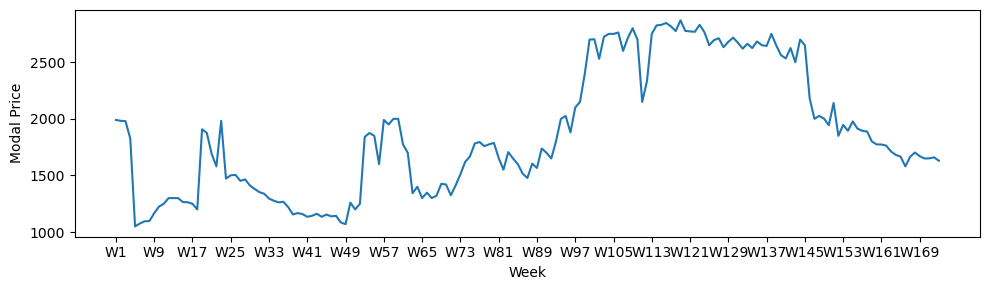

In [17]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=df1,x=df1.index,y='Modal Price')
plt.xticks(df1.index[::8]) 
plt.xlabel('Week')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()

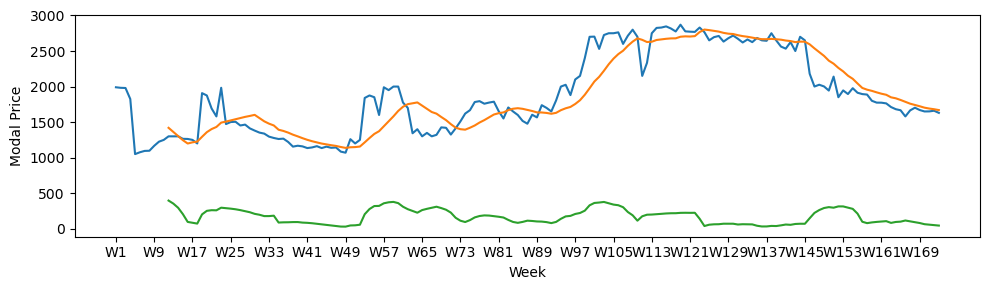

In [18]:
df1['rollMean']  = df1['Modal Price'].rolling(window=12).mean()
df1['rollStd']  = df1['Modal Price'].rolling(window=12).std()

plt.figure(figsize=(10,3))

sns.lineplot(data=df1,x=df1.index,y=df1['Modal Price'])
sns.lineplot(data=df1,x=df1.index,y=df1.rollMean)

sns.lineplot(data=df1,x=df1.index,y=df1.rollStd)
plt.xticks(df1.index[::8]) 
plt.xlabel('Week')
plt.ylabel('Modal Price')

plt.tight_layout()
plt.show() 

In [19]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df1['Modal Price'],autolag='AIC',)
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
print(stats)
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

Test Statistic                  -1.758868
p-value                          0.401065
#lags used                       9.000000
number of observations used    163.000000
dtype: float64
criticality 1% : -3.471118535474365
criticality 5% : -2.8794405060097024
criticality 10% : -2.576313761526591


In [20]:
-1.758868<-3.4816817173418295

False

In [21]:
air_df=pd.DataFrame()

In [22]:
air_df['shift'] = df1['Modal Price'].shift(24)
air_df['shiftDiff'] = df1['Modal Price'] - air_df['shift']
air_df.head()

,shift,shiftDiff
Date_Index,,
W1,NaN,NaN
W2,NaN,NaN
W3,NaN,NaN
W4,NaN,NaN
W5,NaN,NaN


In [23]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(air_df['shiftDiff'].dropna(),autolag='AIC',)
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
print(stats)

for key, values in adfTest[4].items():
    print('criticality',key,":",values)

Test Statistic                  -2.087229
p-value                          0.249681
#lags used                       9.000000
number of observations used    139.000000
dtype: float64
criticality 1% : -3.4782936965183815
criticality 5% : -2.882567574015525
criticality 10% : -2.5779830117488745


In [24]:
stats[0]

-2.087229389380169

<Axes: xlabel='Date_Index', ylabel='shiftDiff'>

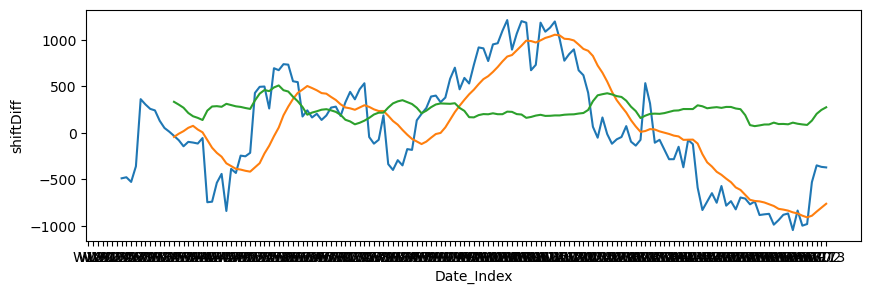

In [25]:
air_df['rollMean']  = air_df['shiftDiff'].rolling(window=12).mean()
air_df['rollStd']  = air_df['shiftDiff'].rolling(window=12).std()

plt.figure(figsize=(10,3))
sns.lineplot(data=air_df,x=air_df.index,y=air_df['shiftDiff'])
sns.lineplot(data=air_df,x=air_df.index,y=air_df.rollMean)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.rollStd)

In [26]:
airP=pd.DataFrame()

In [27]:
airP['Modal Price'] = df1['Modal Price'].copy(deep=True)
airP['firstDiff'] = df1['Modal Price'].diff()
airP['Diff12'] = df1['Modal Price'].diff(12)

In [28]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=20).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=20).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)

    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

C:\Users\Gayathri\AppData\Local\Temp\ipykernel_10428\1384540531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=20).mean()
C:\Users\Gayathri\AppData\Local\Temp\ipykernel_10428\1384540531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=20).std()


Test Statistic                -1.062855e+01
p-value                        5.287010e-19
#lags used                     1.000000e+00
number of observations used    1.590000e+02
dtype: float64
criticality 1% : -3.472161410886292
criticality 5% : -2.8798954259680936
criticality 10% : -2.5765565828092245


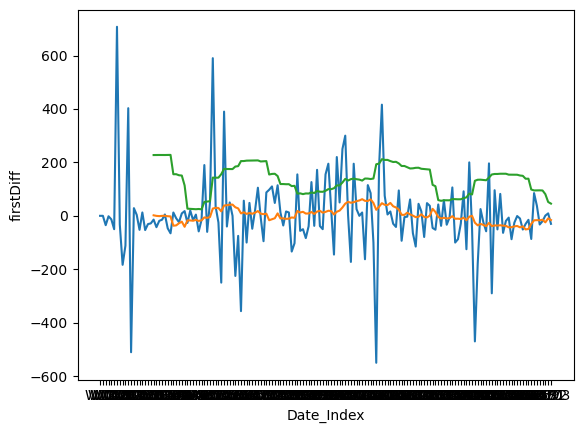

In [29]:
test_stationarity(airP.dropna(),'firstDiff')

In [30]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
import numpy as np
import statsmodels.api as sm

# Example time series data
#time_series_data = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Calculate ACF
acf_values = sm.tsa.acf(df1['Modal Price'], fft=False)

print("ACF Values:", acf_values)


ACF Values: [1.         0.96092557 0.92608697 0.89979794 0.87354688 0.838941
 0.81136816 0.78198521 0.74679101 0.72340035 0.69477434 0.66712068
 0.643433   0.62712278 0.6100915  0.60134997 0.59198668 0.57734622
 0.5632157  0.55516607 0.53835666 0.51769363 0.4966132 ]


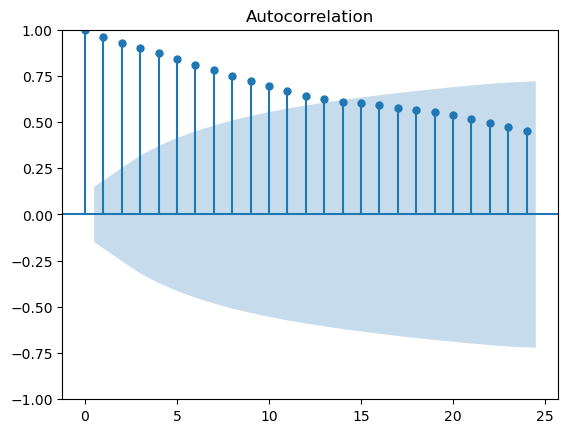

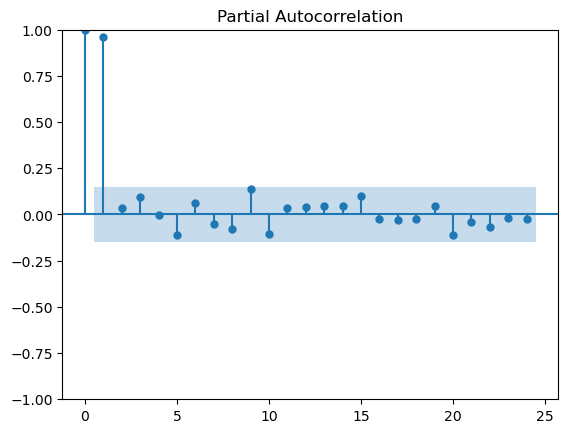

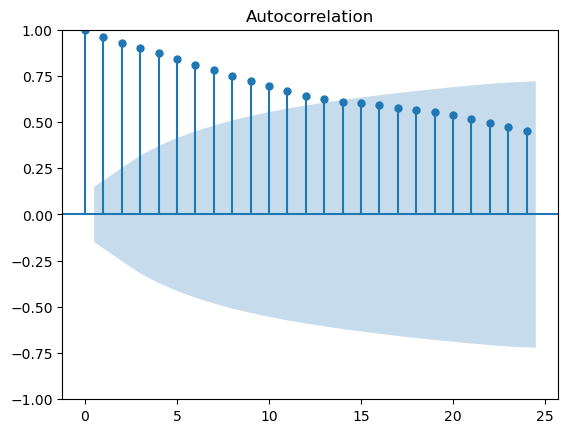

In [32]:
plot_pacf(df1['Modal Price'],lags=24)
plot_acf(df1['Modal Price'],lags=24)

In [33]:
'From PACF  '# AR p 6
'The Data is staionery by itself' #d 0 Default Staionery
'From ACF  '# MA q 1

'From ACF  '

In [34]:
train = df1[:round(len(df1)*70/100)]
test = df1[round(len(df1)*70/100):]
test.head()

,State,District,Market,Variety,Group,Arrivals,Min Price,Max Price,Modal Price,Reported Date,Commodity,Year,Month,Week,Date_Group,Dummy_Index,rollMean,rollStd
Date_Index,,,,,,,,,,,,,,,,,,
W122,Rajasthan,Alwar,Alwar,Other,Cereals,36.6,2621.250000,2812.500000,2768.75,2022-05-23,Barley (Jau),2022,5,21,2022#5#21,W122,2709.513889,224.759341
W123,Rajasthan,Alwar,Alwar,Other,Cereals,2.4,2800.000000,2850.000000,2830.00,2022-05-30,Barley (Jau),2022,5,22,2022#5#22,W123,2766.180556,140.974579
W124,Rajasthan,Alwar,Alwar,Other,Cereals,11.3,2725.000000,2800.000000,2765.00,2022-06-01,Barley (Jau),2022,6,22,2022#6#22,W124,2802.097222,38.557429
W125,Rajasthan,Alwar,Alwar,Other,Cereals,4.1,2612.500000,2662.500000,2650.00,2022-06-06,Barley (Jau),2022,6,23,2022#6#23,W125,2793.763889,57.159696
W126,Rajasthan,Alwar,Alwar,Other,Cereals,35.0,2680.833333,2699.333333,2695.00,2022-06-13,Barley (Jau),2022,6,24,2022#6#24,W126,2782.930556,62.747559


In [35]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['Modal Price'],order=(9,0,7))
model_fit = model.fit()

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

In [36]:
test.index[-1]

'W173'

In [37]:
dd=model_fit.forecast(steps=len(test))

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
dd=pd.DataFrame()
dd['arimaPred']=pd.concat([train['Modal Price'],model_fit.forecast(steps=len(test))])

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [39]:
dd.index=df1.index

In [40]:
len(model_fit.forecast(steps=len(test)))

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


52

<Axes: xlabel='Date_Index', ylabel='Modal Price'>

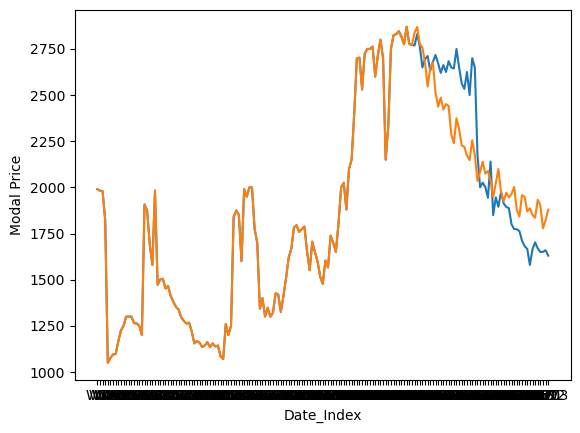

In [41]:
sns.lineplot(data=df1,x=df1.index,y='Modal Price')
sns.lineplot(data=dd,x=dd.index,y='arimaPred')

In [42]:
dd['arimaPred']

Date_Index
W1      1990.000000
W2      1982.500000
W3      1980.000000
W4      1825.000000
W5      1050.000000
           ...     
W169    1932.332225
W170    1902.706495
W171    1778.137616
W172    1822.234261
W173    1879.216425
Name: arimaPred, Length: 173, dtype: float64

In [43]:
#import statsmodels.api as sm
#model = sm.tsa.statespace.SARIMAX(train['Modal Price'],order=(2,0,5),seasonal_order=(2,0,5,20))
#model_fit = model.fit()

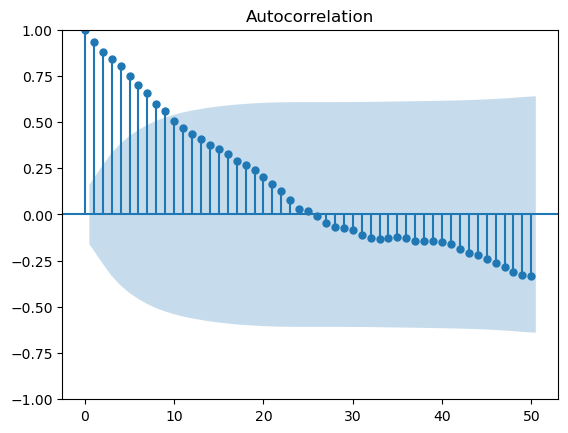

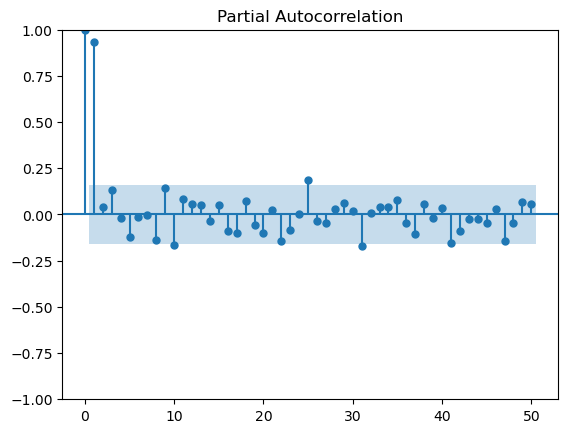

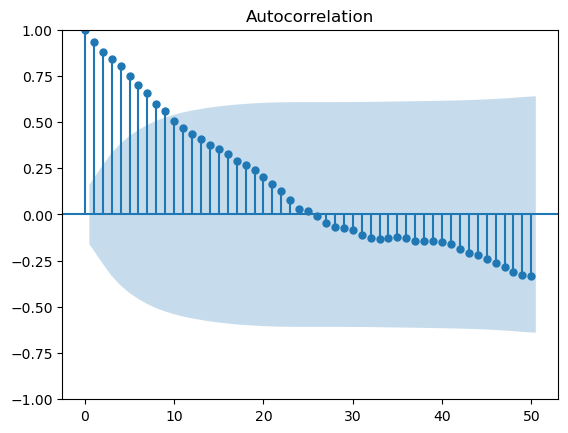

In [44]:
plot_pacf(air_df['shiftDiff'].dropna(),lags=50)
plot_acf(air_df['shiftDiff'].dropna(),lags=50)

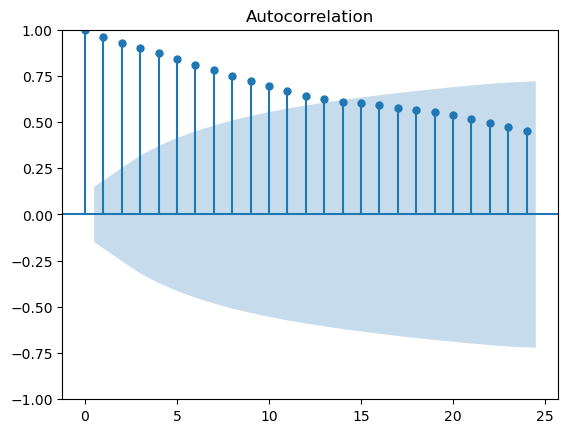

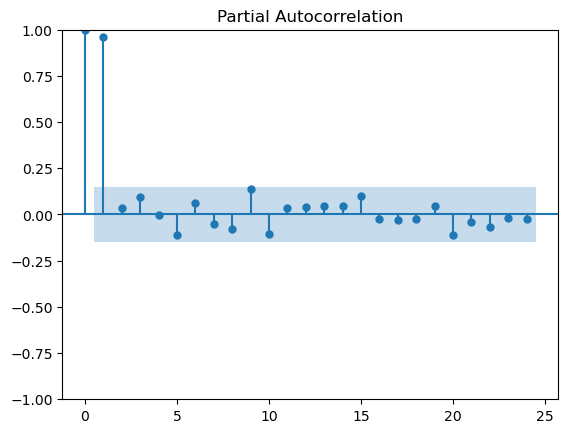

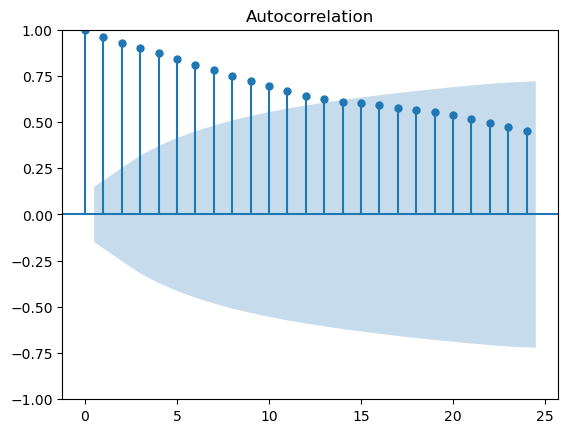

In [45]:
plot_pacf(df1['Modal Price'],lags=24)
plot_acf(df1['Modal Price'],lags=24)

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal 

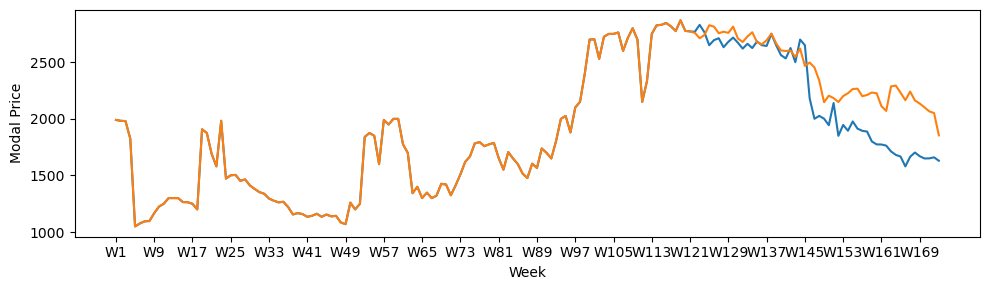

In [46]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train['Modal Price'],order=(9,0,7),seasonal_order=(9,0,7,24))
model_fit = model.fit()
dd=model_fit.forecast(steps=len(test))
dd=pd.DataFrame()
dd['arimaPred']=pd.concat([train['Modal Price'],model_fit.forecast(steps=len(test))])
dd.index=df1.index
plt.figure(figsize=(10,3))
sns.lineplot(data=df1,x=df1.index,y='Modal Price')
sns.lineplot(data=dd,x=dd.index,y='arimaPred')
plt.xticks(df1.index[::8])
plt.xlabel('Week')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()

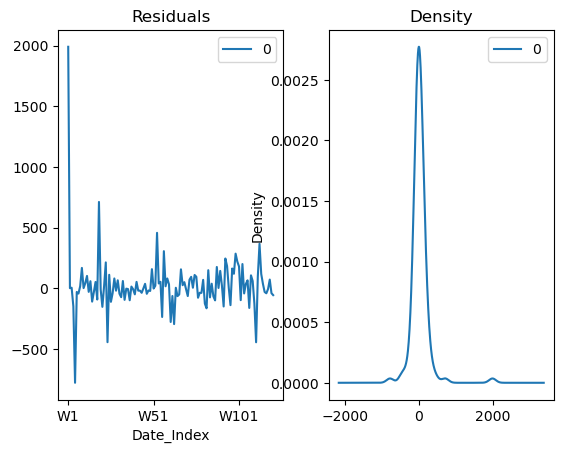

In [47]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
#Based on the visualizations and analysis, including the residuals,
#the SARIMAX model effectively captures the overall trend of the time series data, demonstrating strong predictive capability